In [1]:
%run /Users/amandaoliphant/Documents/GitHub/ProteinComplexes/Analysis_Functions.ipynb

All files already downloaded and correct.
All files already downloaded and correct.
All files already downloaded and correct.
All files already downloaded and correct.


In [35]:
%run /Users/amandaoliphant/Documents/GitHub/ProteinComplexes/Plotting_Functions.ipynb

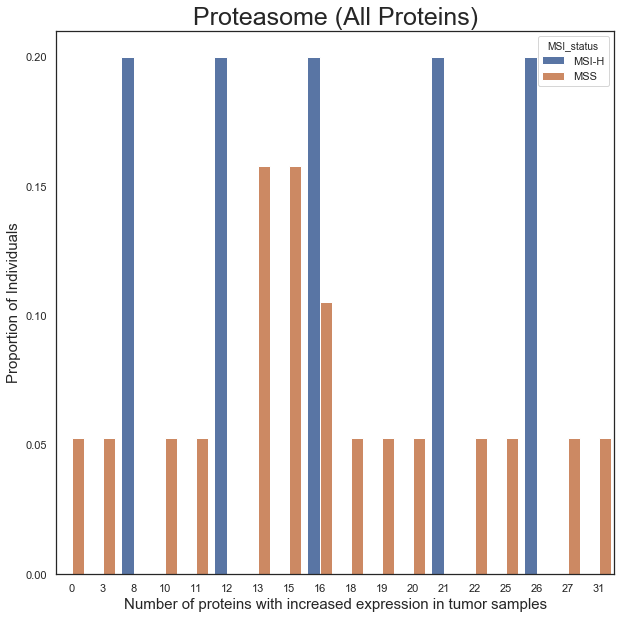

In [36]:
plot_complex_clinical('en', 'MSI_status', sig_results, expression_change='increased', complex_name = 'Proteasome (All Proteins)', bin_size = 1)

t-test result MSS vs MSI-H: 0.8517289008091673


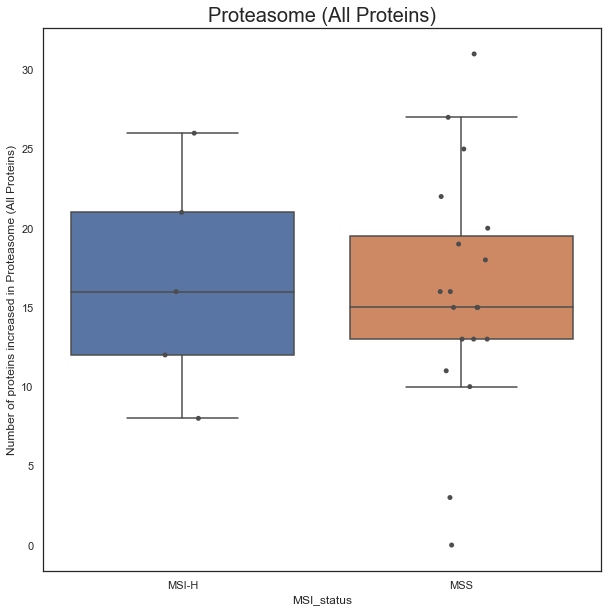

In [37]:
plot_complex_clinical('en', 'MSI_status', sig_results, expression_change='increased', complex_name = 'Proteasome (All Proteins)', boxplot = True)

## The Proteasome

There is evidence that aberrations in the proteasome are involved in ovarian cancer. For example, increased ubiquitination/degradation of MKP3 (DUSP6), which leads to constitutive activation of the ERK pathway (cell proliferation, growth, survival). Proteasomal degradation of cyclins could also play a role; overexpression of cyclin G2 inhibits ovarian cancer cell proliferation, so increased degradation of cyclin G2 leads to proliferation (PMID: 23300358). 

It has also been found that low-grade and high-grade ovarian carcinoma tissues have elevated 19S and 20S proteasome subunits. Ovarian carcinoma cell lines are sensitive to apoptosis in response to proteasome inhibitors (PMID: 16585202).

One study showed that circulating 20S proteasome concentration is higher in untreated ovarian cancer patients (PMID: 21075439).

### Proteasomal Proteins
Perform t-tests on tumor vs normal protein expression for the proteins within the proteasomal complexes

In [25]:
proteasome_proteins = subunitNames['PA700 complex'] + subunitNames['26S proteasome'] + subunitNames['20S proteasome'] + subunitNames['PA28-20S proteasome'] + subunitNames['PA700-20S-PA28 complex'] + subunitNames['PA28gamma-20S proteasome']
sig_results = []
# Remove duplicates
proteasome_proteins = list(set(proteasome_proteins))
# Bonferroni correction of the p-value
alpha = 0.05 / len(proteasome_proteins)
# Perform t-tests
for protein in proteasome_proteins:
    pval = ttest_proteomics(protein, cancer_type = 'en')
    if pval < alpha:
        sig_results.append(protein)
        print('p-value for ' + protein + ' (tumor vs normal): ' + str(pval))

p-value for PSMD1 (tumor vs normal): 1.1282701701490881e-22
p-value for PSMD14 (tumor vs normal): 6.616688710290895e-07
p-value for PSME1 (tumor vs normal): 9.137399470881286e-15
p-value for PSMB1 (tumor vs normal): 6.823822522685448e-14
p-value for PSMC1 (tumor vs normal): 1.3062725417323841e-17
p-value for PSMA3 (tumor vs normal): 5.209818391466488e-15
p-value for PSME2 (tumor vs normal): 3.335877915686798e-20
p-value for PSMB4 (tumor vs normal): 7.257314453589449e-11
p-value for PSMB2 (tumor vs normal): 0.00010342413871318537
p-value for PSMC6 (tumor vs normal): 3.242205490721434e-09
p-value for PSMC3 (tumor vs normal): 2.701717410346643e-06
p-value for PSMA1 (tumor vs normal): 8.081441898376051e-11
p-value for PSMB7 (tumor vs normal): 0.0003889619250666454
p-value for PSMC2 (tumor vs normal): 4.1280622786079445e-11
p-value for PSMD6 (tumor vs normal): 9.820161725259457e-20
p-value for PSMD3 (tumor vs normal): 2.6047378957194087e-11
p-value for PSMA5 (tumor vs normal): 1.87068089367

In [33]:
len(sig_results)

32

#### Divide significant results into subunits of the proteasome

In [17]:
sub_20s = []
sub_19s = []
pa28 = []
for protein in sig_results:
    if 'PSMA' in protein or 'PSMB' in protein: sub_20s.append(protein)
    elif 'PSMC' in protein or 'PSMD' in protein: sub_19s.append(protein)
    else: pa28.append(protein) 
sub_20s.sort()
sub_19s.sort()
pa28.sort()

### 20S Proteasome

PSMA1: 8.081441898376051e-11
PSMA2: 4.613888753103794e-09
PSMA3: 5.209818391466488e-15
PSMA4: 1.8911459532961918e-13
PSMA5: 1.8706808936785956e-06
PSMA6: 8.341424511245449e-15
PSMA7: 1.5755195109069624e-08
PSMB1: 6.823822522685448e-14
PSMB2: 0.00010342413871318537
PSMB3: 8.14688356935769e-12
PSMB4: 7.257314453589449e-11
PSMB6: 5.477652449070224e-05
PSMB7: 0.0003889619250666454


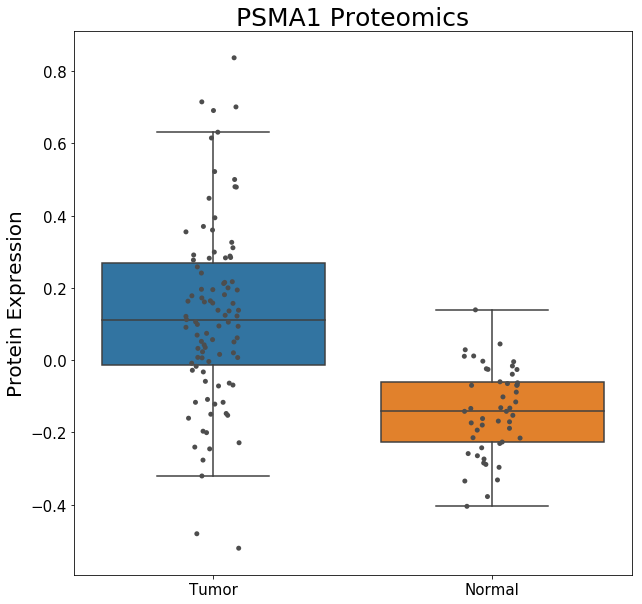

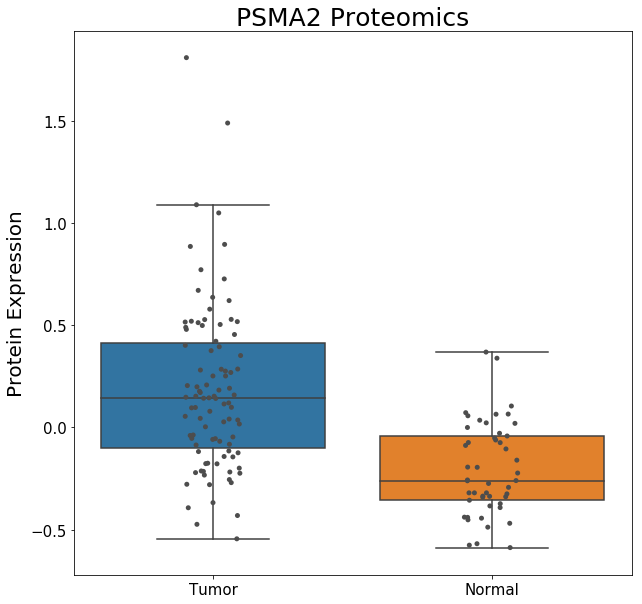

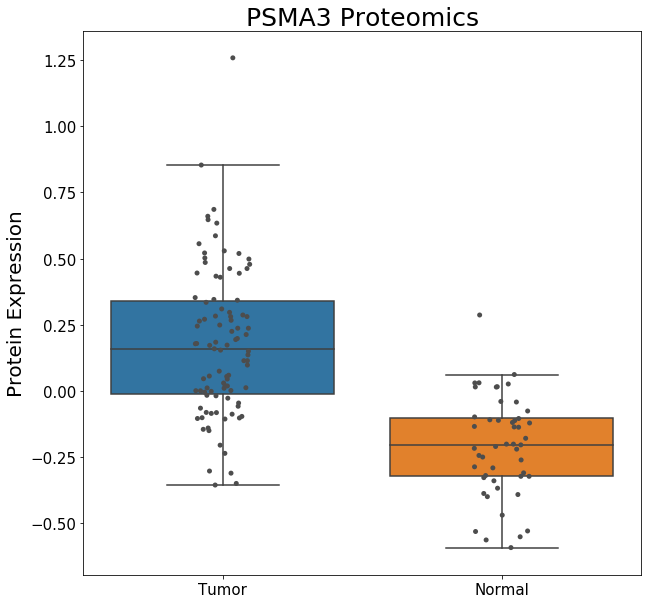

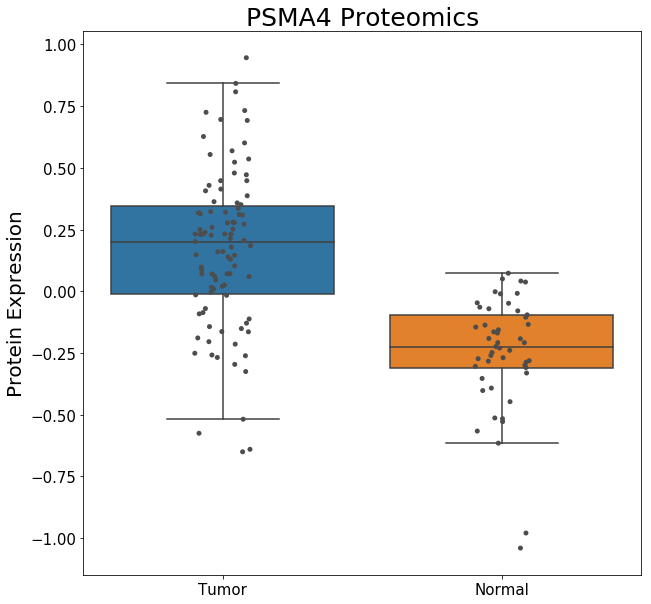

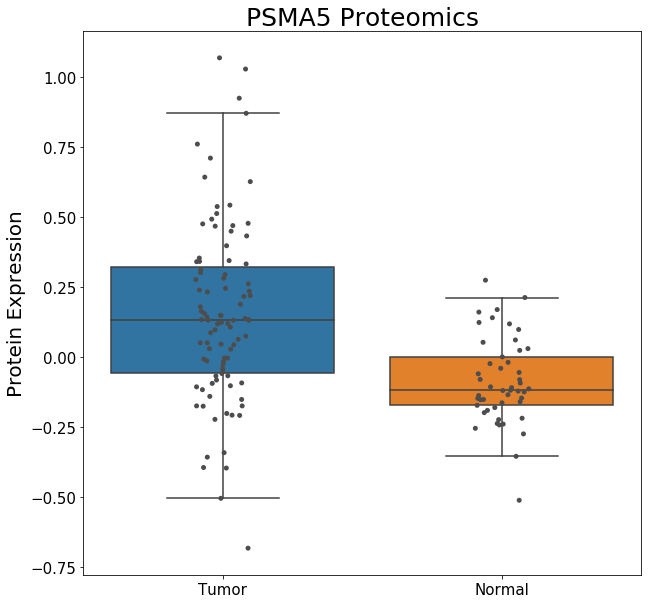

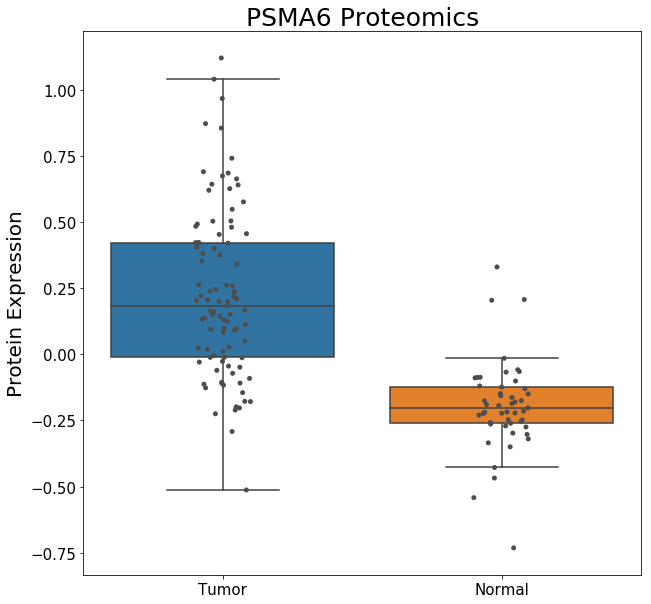

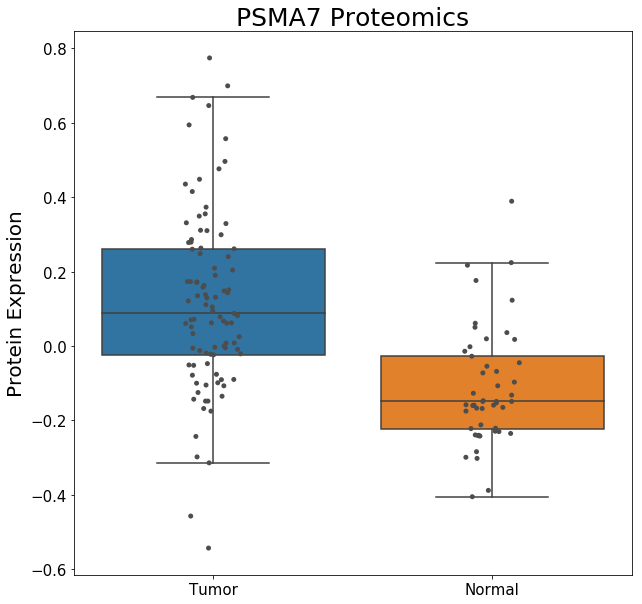

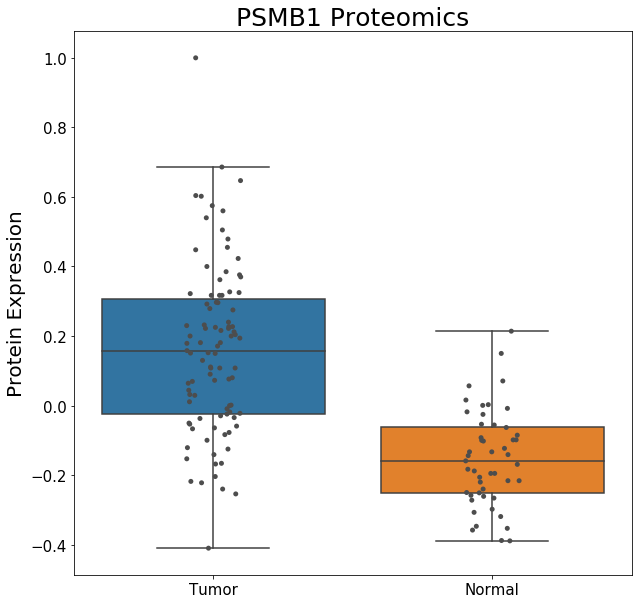

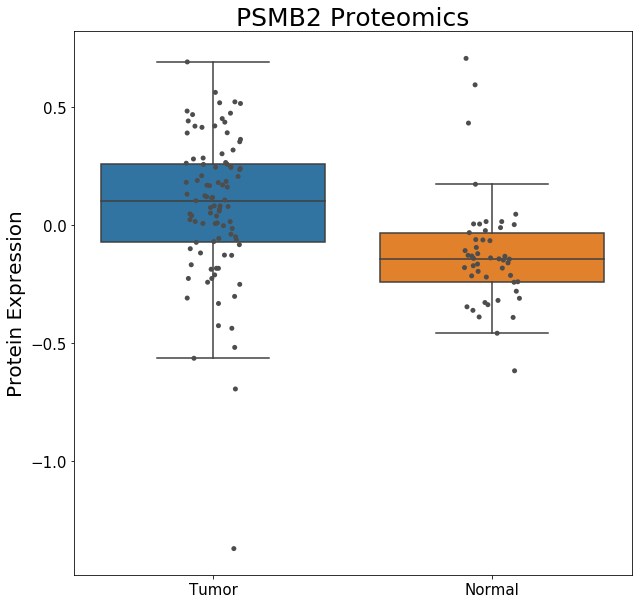

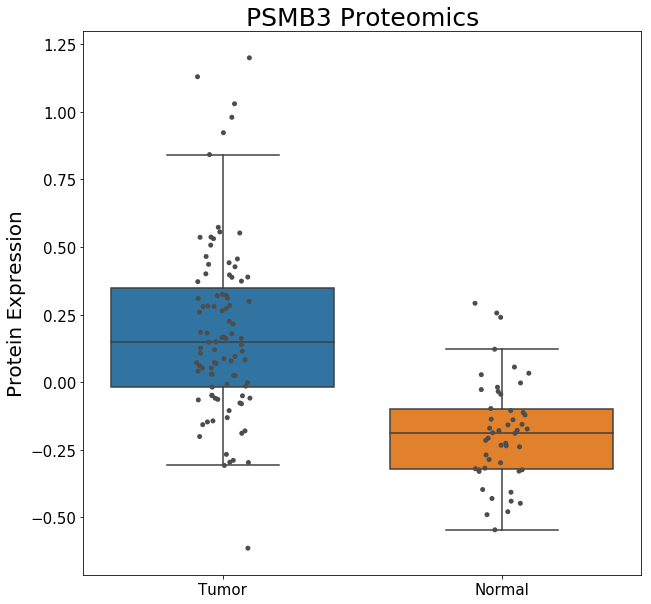

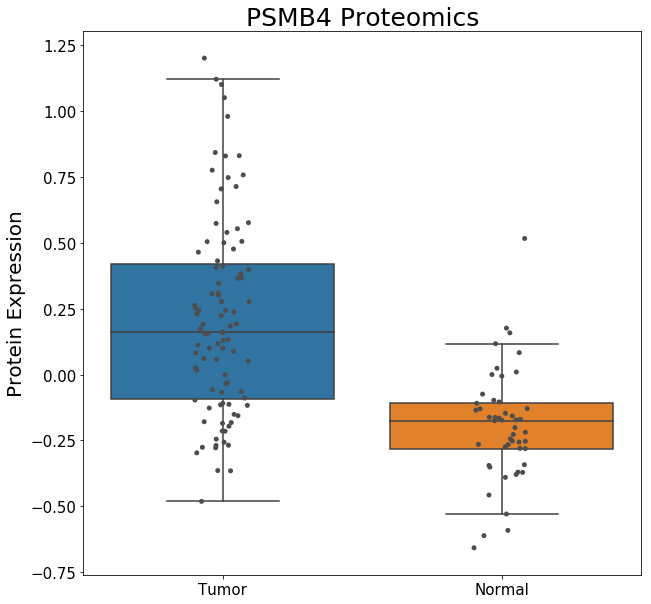

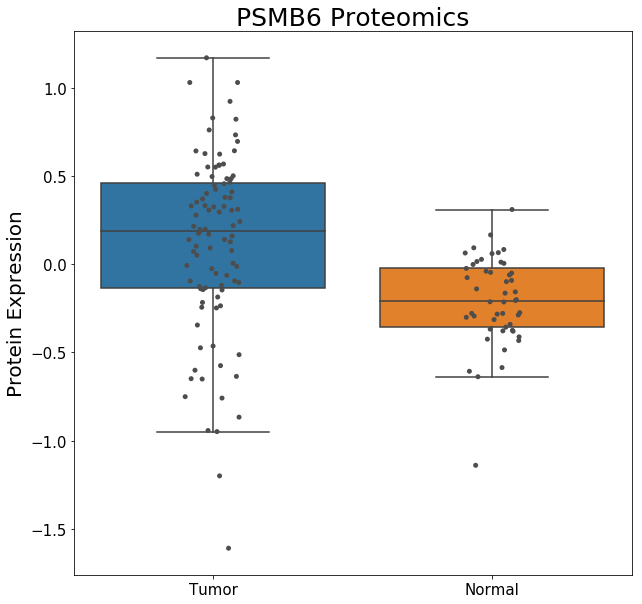

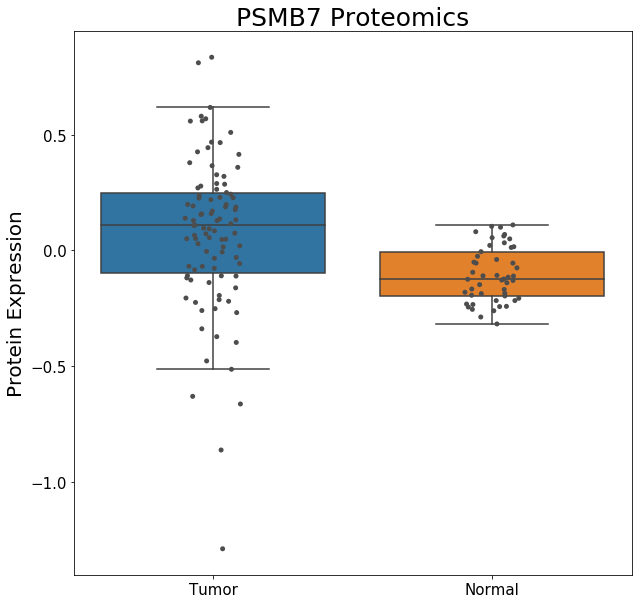

In [19]:
for protein in sub_20s:
    pval = ttest_proteomics(protein, cancer_type = 'en')
    print(protein + ': ' + str(pval))
    plot_proteomics(protein, print_pvals = False, cancer_type = 'en')

### 19S Regulatory Subunit (PA700)

PSMC1: 1.3062725417323841e-17
PSMC2: 4.1280622786079445e-11
PSMC3: 2.701717410346643e-06
PSMC4: 1.0369044970405485e-14
PSMC5: 3.419344018946431e-07
PSMC6: 3.242205490721434e-09
PSMD1: 1.1282701701490881e-22
PSMD11: 2.9641395664172376e-09
PSMD12: 1.1380157940576892e-15
PSMD13: 7.830366956103833e-13
PSMD14: 6.616688710290895e-07
PSMD2: 1.2947987908294717e-24
PSMD3: 2.6047378957194087e-11
PSMD6: 9.820161725259457e-20
PSMD7: 1.731650624101323e-14
PSMD8: 3.7113558956642077e-08


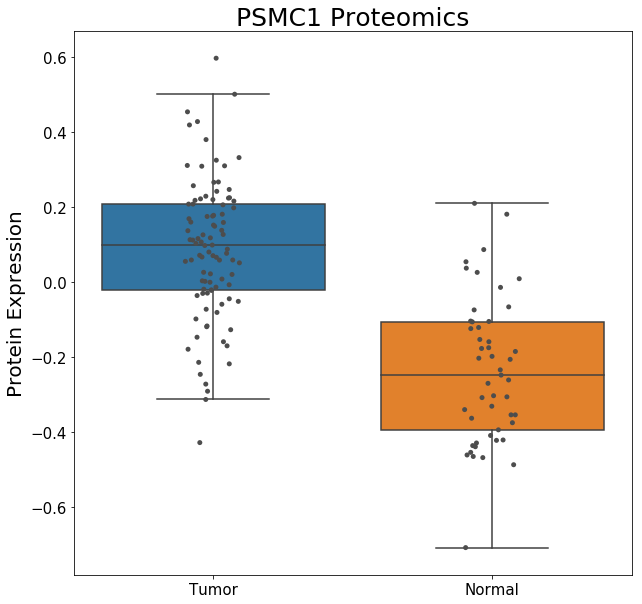

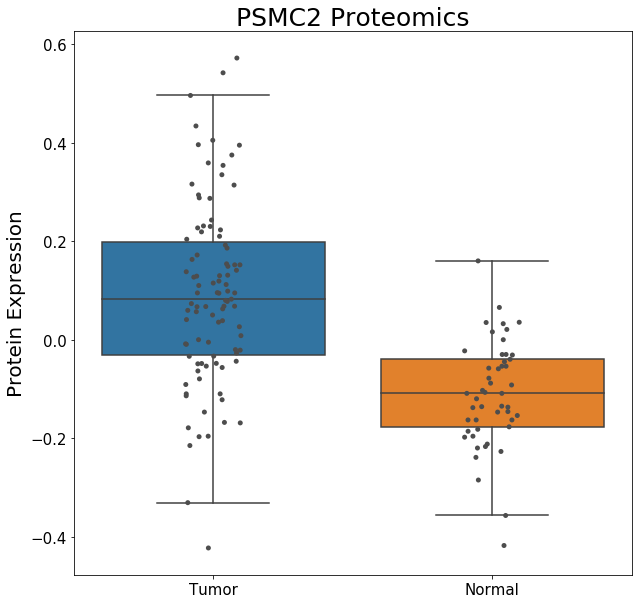

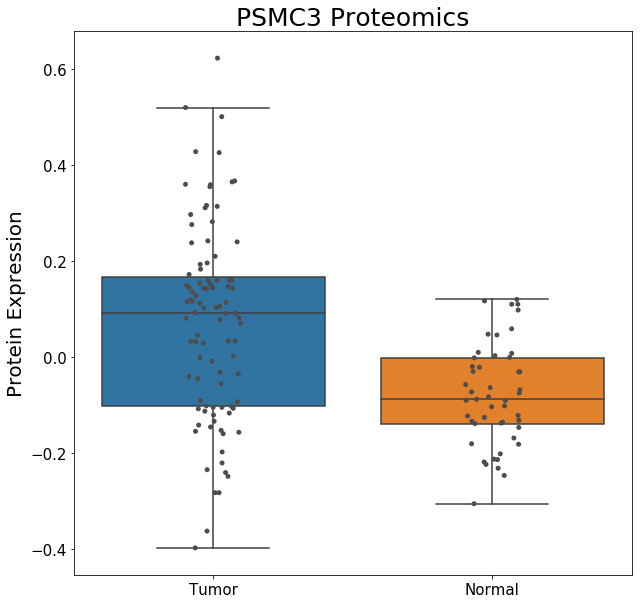

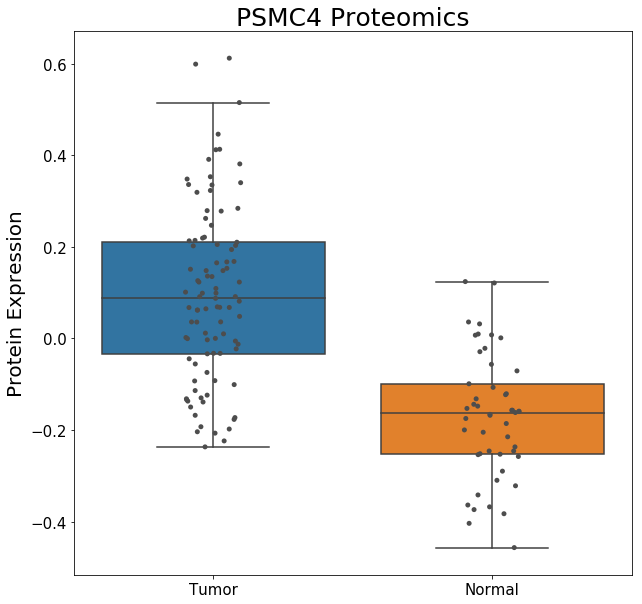

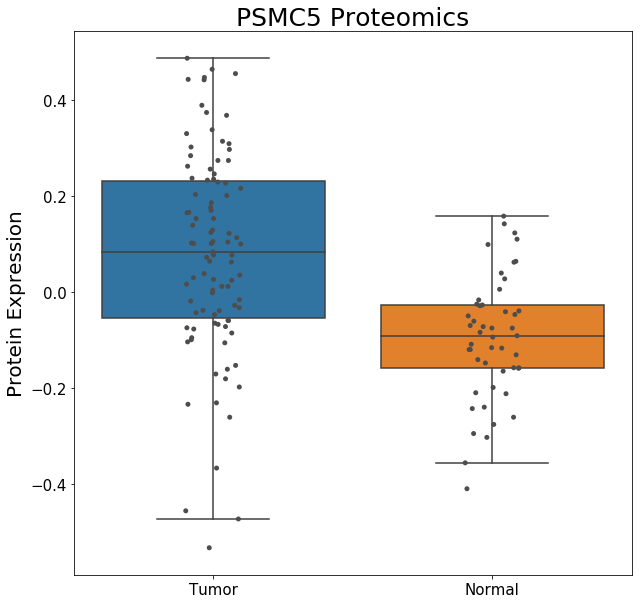

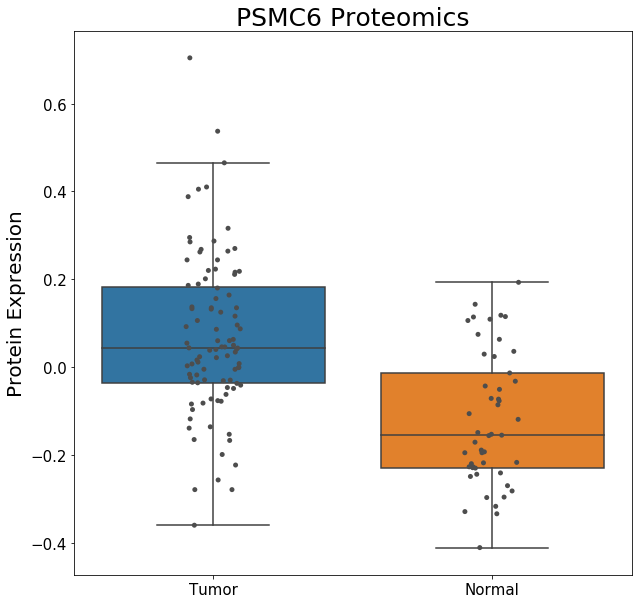

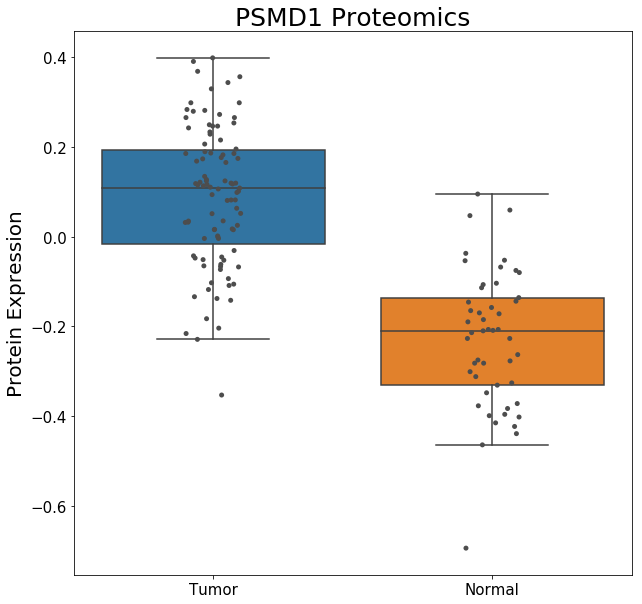

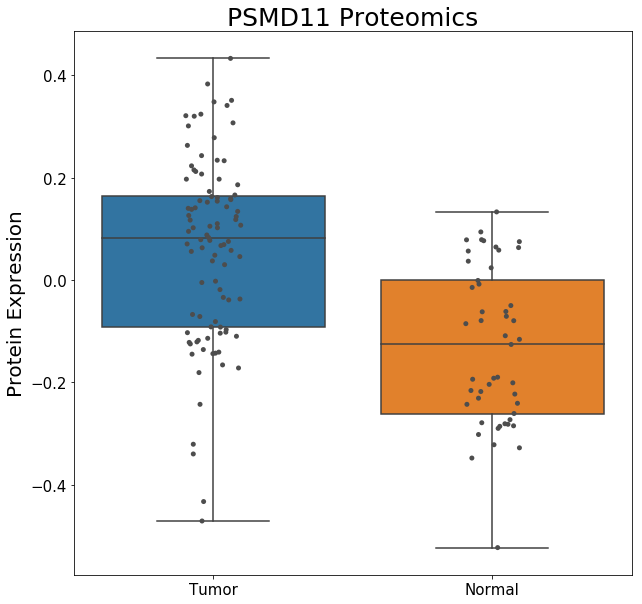

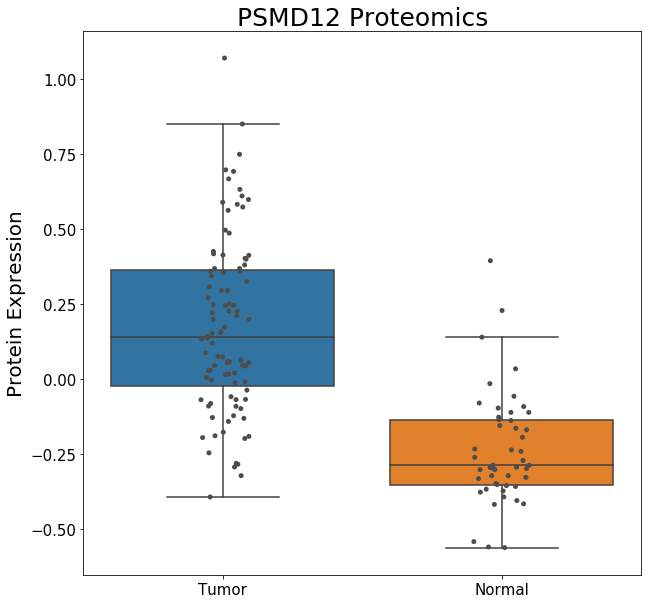

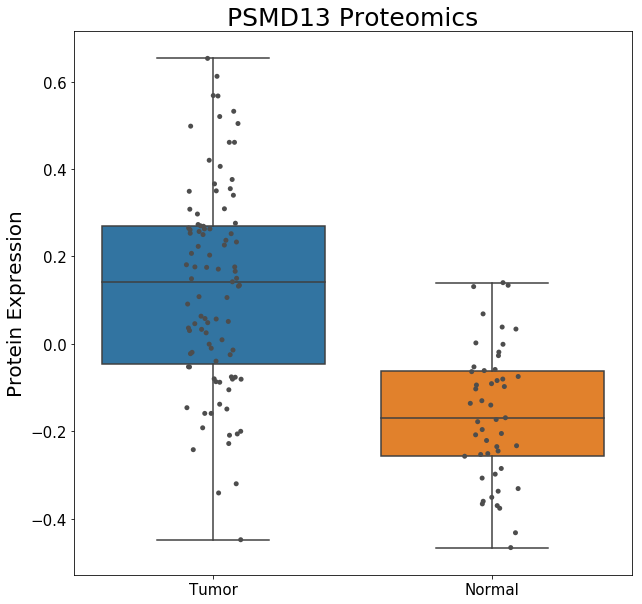

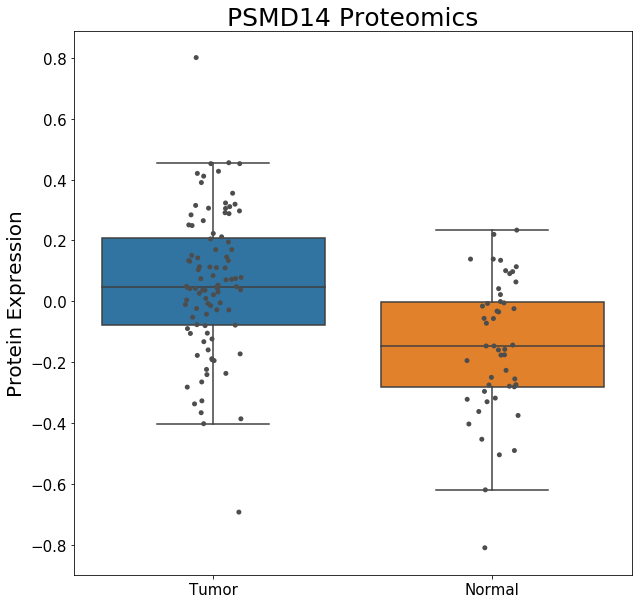

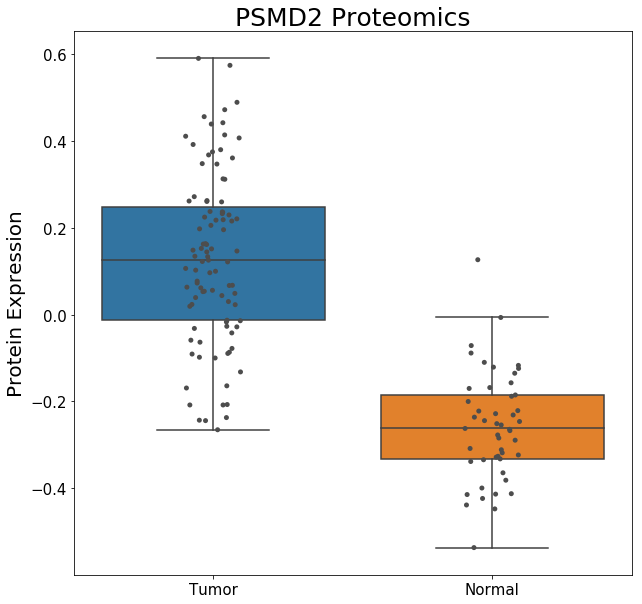

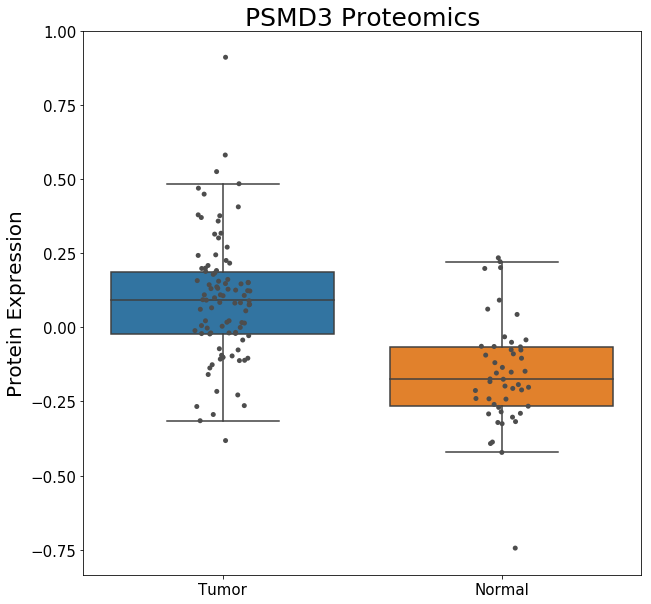

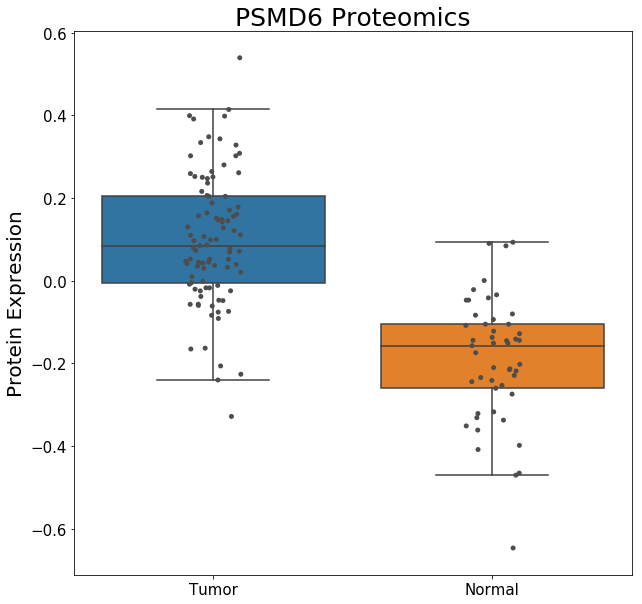

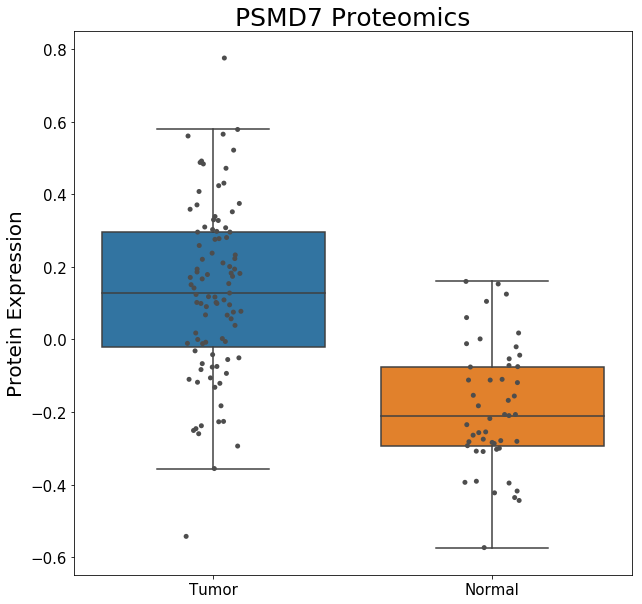

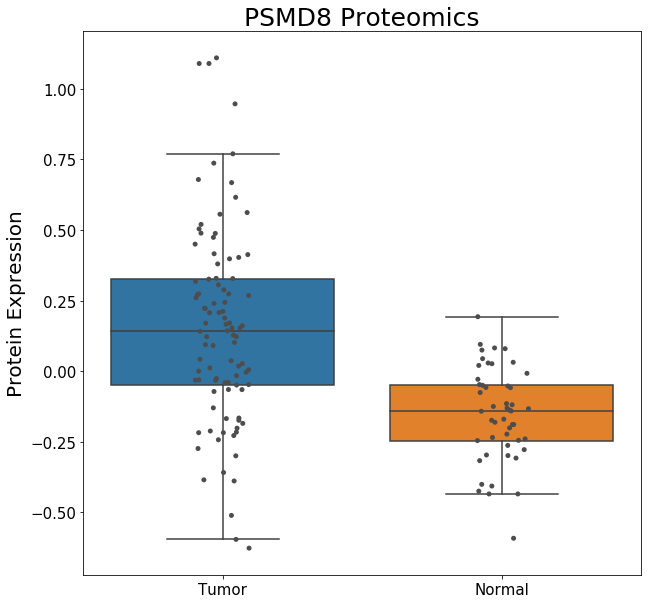

In [20]:
for protein in sub_19s:
    pval = ttest_proteomics(protein, cancer_type = 'en')
    print(protein + ': ' + str(pval))
    plot_proteomics(protein, print_pvals = False, cancer_type = 'en')

### PA28 (11S REG subunit)

PSME1: 9.137399470881286e-15
PSME2: 3.335877915686798e-20
PSME3: 3.2789909710698065e-21


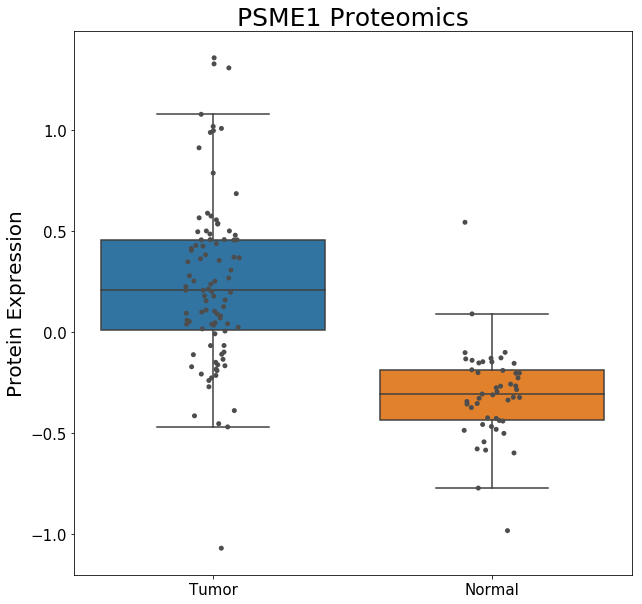

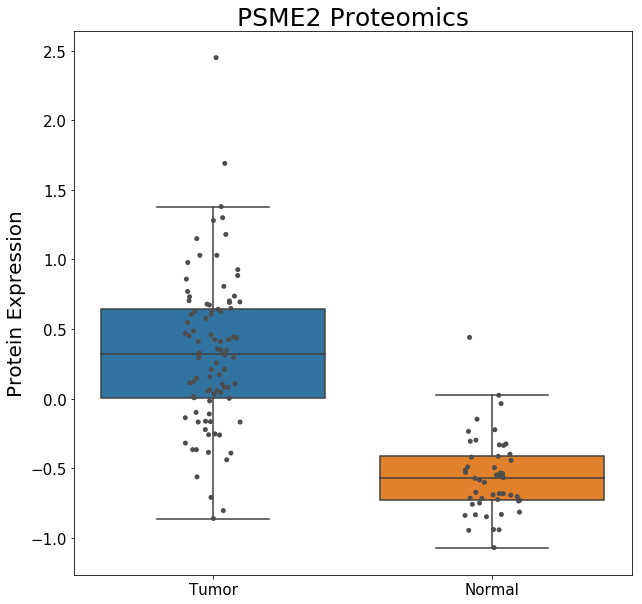

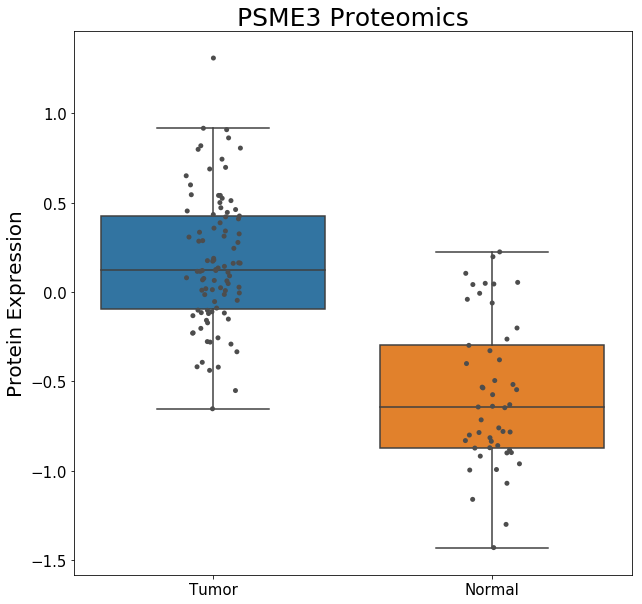

In [21]:
for protein in pa28:
    pval = ttest_proteomics(protein, cancer_type = 'en')
    print(protein + ': ' + str(pval))
    plot_proteomics(protein, print_pvals = False, cancer_type = 'en')